In [57]:
import time
import matplotlib.pyplot as plt
import numpy as np

Función para generar números pseudoaleatorios con el método Lehmer

In [58]:
# Solicitar entrada del usuario para el rango inicial, final y cantidad de números a generar
range_start = int(input("Ingrese el rango inicial: "))
range_end = int(input("Ingrese el rango final: "))
num_numbers = int(input("Ingrese la cantidad de números a generar: "))

print("Rango: ", range_start, " y ", range_end)
print("Cantidad: ", num_numbers)

Rango:  100  y  560
Cantidad:  850


Generador de números aleatorios usando el método Lehmer

In [59]:
def lehmer(seed=None):
    
    # Obtener la semilla a partir de la hora del computador
    if seed is None:
        seed = int(time.time())
        sem = seed
    
    a = 16807 # factor multiplicativo
    m = 2147483647 # modulo
    
    semilla = sem
    numbers = []
    sucession = []
    positions = []
    
    for i in range(1,num_numbers+1):
        xn = (a * seed) % m
        xu = xn
        
        numbers.append(int((range_start + (range_end - range_start) * xu)))
        
        sucession.append(xu)
        positions.append(i)
        seed = xn
    return semilla, numbers, sucession, positions

In [60]:
semilla, list_numbers, list_succession, list_positions = lehmer()

print('Semilla inicial:', semilla)
print('Numeros generados: ', list_numbers)
print('Intervalos: ', list_succession)
print('posiciones: ', list_positions)

Semilla inicial: 1681902157
Numeros generados:  [185061329580, 597645022700, 237582398140, 188069318340, 772945753400, 770695010200, 480468197360, 604579283040, 216283573360, 805540616940, 339991447880, 555372284480, 18412543380, 264919412000, 294509170060, 724806641620, 739632494520, 981437824580, 31824736700, 455567643880, 946187455560, 284359189560, 42990528760, 428964048500, 324359788140, 600166081220, 131786406120, 191291154200, 591004783320, 261279109540, 358179337280, 8061368080, 152992206020, 973878130300, 407722585720, 918071743120, 920126990460, 888182317140, 392523175560, 324944409960, 547480233760, 735450571040, 832665807240, 837682637160, 201090027280, 310970876340, 800810355980, 853736180380, 331994535560, 497843878560, 236279835920, 28440594440, 873152382020, 672077884440, 622112995400, 528328877120, 895247226680, 591360499940, 312753476160, 137848724500, 332900972000, 914683961340, 288699838340, 883773707960, 385214508800, 968491877140, 762473666640, 602293851240, 33088

Funcion para buscar patrones en la lista de numeros generados

In [61]:
# Se crea una funcion para iterar la lista de numeros generados y buscar un patron si es que existe dentro de la secuencia generada
def search_pattern(numbers):
    for i in range(1, len(numbers)):
        pattern = numbers[:i]
        repetitions = len(numbers) // len(pattern)
        if numbers == pattern * repetitions:
            return pattern
    return None

Verificar si existe un patron en la secuencia

In [62]:
print("Numero generados: ", list_numbers)

pattern = search_pattern(list_numbers)
if pattern is not None:
    print("Se encontró el patrón en la secuencia:", pattern)
else:
    print("\033[91mNo se encontró ningún patrón en la secuencia\033[0m")


Numero generados:  [185061329580, 597645022700, 237582398140, 188069318340, 772945753400, 770695010200, 480468197360, 604579283040, 216283573360, 805540616940, 339991447880, 555372284480, 18412543380, 264919412000, 294509170060, 724806641620, 739632494520, 981437824580, 31824736700, 455567643880, 946187455560, 284359189560, 42990528760, 428964048500, 324359788140, 600166081220, 131786406120, 191291154200, 591004783320, 261279109540, 358179337280, 8061368080, 152992206020, 973878130300, 407722585720, 918071743120, 920126990460, 888182317140, 392523175560, 324944409960, 547480233760, 735450571040, 832665807240, 837682637160, 201090027280, 310970876340, 800810355980, 853736180380, 331994535560, 497843878560, 236279835920, 28440594440, 873152382020, 672077884440, 622112995400, 528328877120, 895247226680, 591360499940, 312753476160, 137848724500, 332900972000, 914683961340, 288699838340, 883773707960, 385214508800, 968491877140, 762473666640, 602293851240, 330887937940, 668264754000, 744590

### Generacion de Diagramas

Diagrama de Dispersion

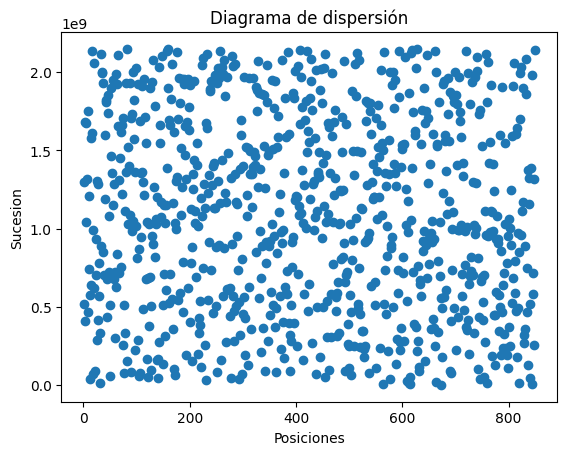

In [63]:
from matplotlib import colors


x = list_positions[:-1]
y = list_succession[1:]
plt.scatter(x, y)
plt.title("Diagrama de dispersión")
plt.xlabel("Posiciones")
plt.ylabel("Sucesion")
plt.show()

Histograma

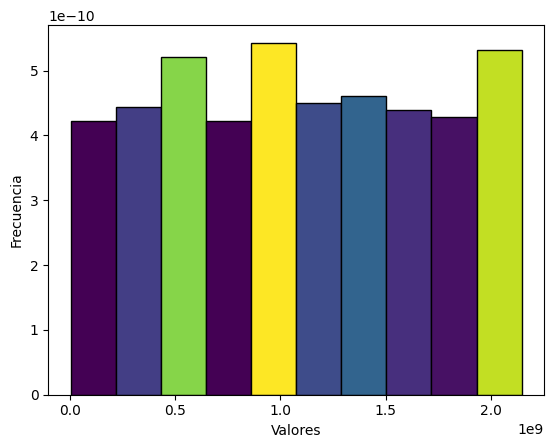

In [64]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(list_succession, bins=10, density=True, color='cornflowerblue', edgecolor='black')

# Personalizar colores de los parches
fracs = n / n.max()
norm = plt.Normalize(fracs.min(), fracs.max())
for patch, frac in zip(patches, fracs):
    color = plt.cm.viridis(norm(frac))
    patch.set_facecolor(color)

# Mostrar el histograma
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

Diagrama de Autocorrelacion

C:\Users\julia\AppData\Local\Temp\ipykernel_14088\2851072388.py:9: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(


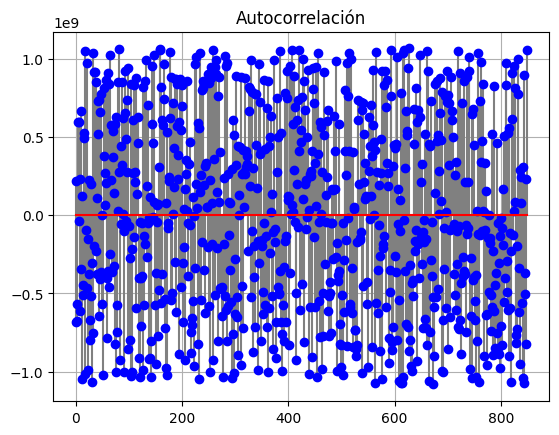

In [65]:
# Calcular autocorrelación
autocorr_data = np.correlate(list_succession, list_succession, mode="full")

# Calcular media de los numeros
media_data = np.mean(list_succession)

# Configuración
# Gráfico de autocorrelación
plt.stem(
    (list_succession - media_data),
    use_line_collection=True,
    linefmt="gray",
    markerfmt="bo",
    basefmt="r-",
)
plt.title("Autocorrelación")
plt.grid(True)
plt.show()